In [1]:
!mkdir Data

In [2]:
!kaggle datasets list -s 'insurance'

ref                                                title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hhs/health-insurance-marketplace                   Health Insurance Marketplace                829MB  2017-05-01 20:16:50          21913        555  0.7352941        
mhdzahier/travel-insurance                         Travel Insurance                            463KB  2019-01-28 01:43:39           7214         85  0.7058824        
hhs/health-insurance                               Health Insurance Coverage                     3KB  2017-03-02 18:40:23           7626        119  0.85294116       
anmolkumar/health-insurance-cross-sell-prediction  Health Insurance Cross Sell Prediction 🏠 🏥    6MB  2020-09-11 18:39:31          24768        609  1.0             

In [3]:
!kaggle datasets download -d mirichoi0218/insurance


  0%|          | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████| 16.0k/16.0k [00:00<00:00, 16.4MB/s]


In [4]:
!unzip -o insurance.zip -d ./Data

Archive:  insurance.zip
  inflating: ./Data/insurance.csv    


In [5]:
!del insurance.zip

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('./Data/insurance.csv')

In [8]:
df.shape

(1338, 7)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Here I have used .describe(include='all') instead of .describe(), which describes all the columns ir-respective of the column type.
## It's observed that the below listed columns are not numeric.
- sex
- smoker
- region

In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Check the unique values of the non-numeric columns

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Create the dictonaries to map the non-numeric values

In [14]:
sex = {
    'female': 1,
    'male': 0
}

In [15]:
smoker = {
    'yes': 1,
    'no': 0
}

In [16]:
region = {
    'southwest': 1, 
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
}

## Replace the column values with dictonary values

In [17]:
df['sex'].replace(sex, inplace=True)
df['smoker'].replace(smoker, inplace=True)
df['region'].replace(region, inplace=True)

In [18]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


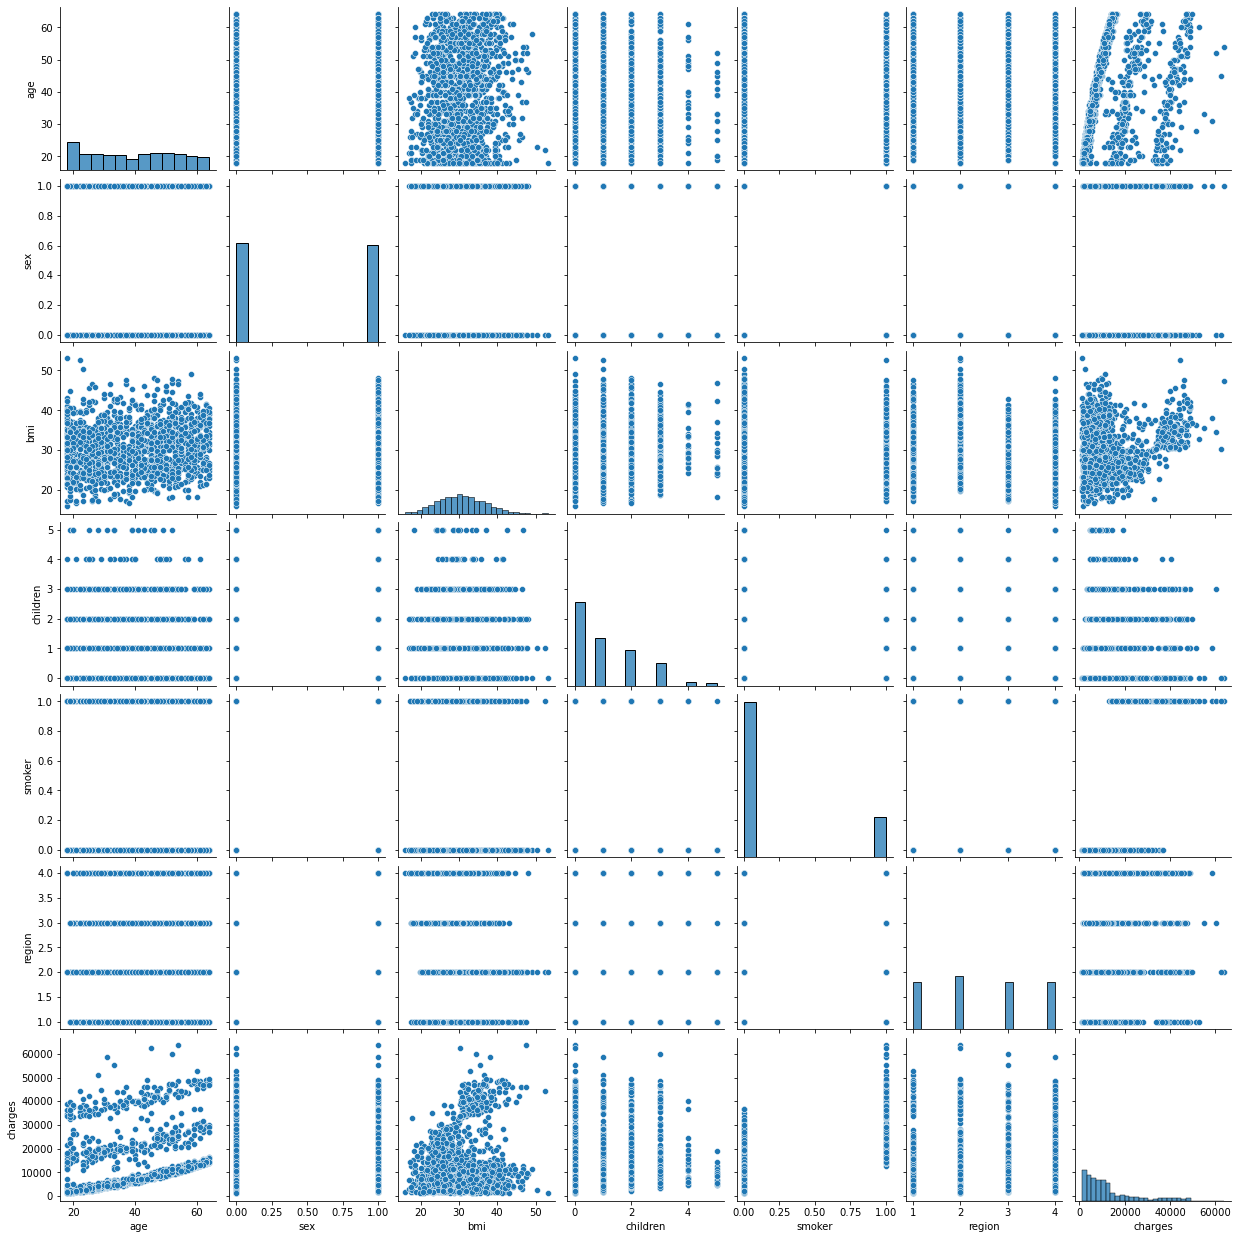

In [19]:
sns.pairplot(df)

In [20]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

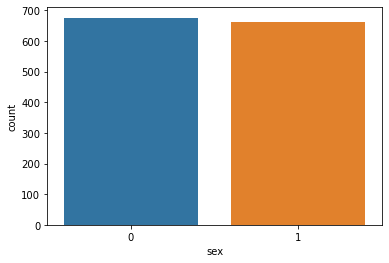

In [21]:
sns.countplot(x='sex', data=df)

<AxesSubplot:xlabel='children', ylabel='count'>

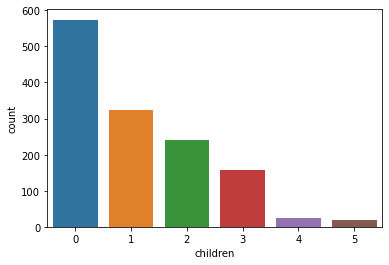

In [22]:
sns.countplot(x='children', data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

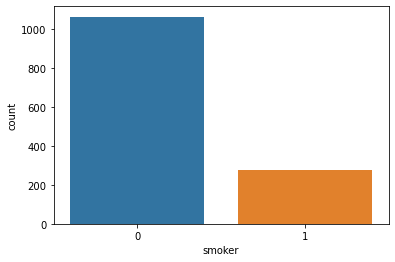

In [23]:
sns.countplot(x='smoker', data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

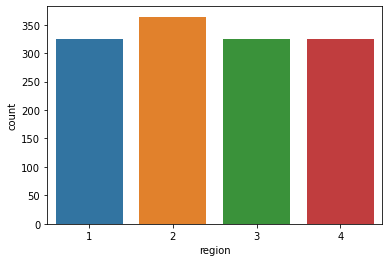

In [24]:
sns.countplot(x='region', data=df)

## Check for outliers

In [25]:
def get_the_count_of_outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    return len(outliers)

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
outlier_dict = {}
for col_value in df.columns:
    outlier_dict[col_value] = get_the_count_of_outliers(df[col_value])
    

Percentiles: 25th=27.000, 75th=51.000, IQR=24.000
Identified outliers: 0
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
Percentiles: 25th=26.296, 75th=34.694, IQR=8.398
Identified outliers: 9
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 0
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 274
Percentiles: 25th=2.000, 75th=3.000, IQR=1.000
Identified outliers: 0
Percentiles: 25th=4740.287, 75th=16639.913, IQR=11899.625
Identified outliers: 139


In [28]:
outlier_dict

{'age': 0,
 'sex': 0,
 'bmi': 9,
 'children': 0,
 'smoker': 274,
 'region': 0,
 'charges': 139}

In [29]:
pd.DataFrame([outlier_dict])

,age,sex,bmi,children,smoker,region,charges
0,0,0,9,0,274,0,139


<AxesSubplot:>

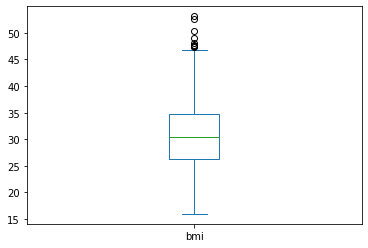

In [30]:
df['bmi'].plot.box()

<AxesSubplot:>

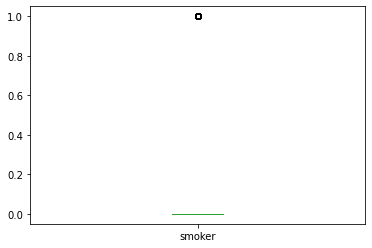

In [31]:
df['smoker'].plot.box()

<AxesSubplot:>

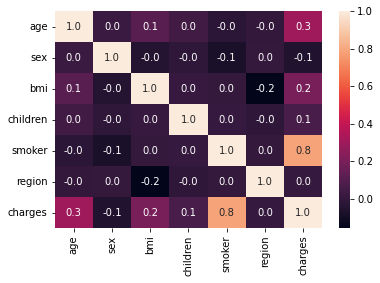

In [32]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

## Model Building

In [33]:
X = df.drop(columns=['charges'])
y = df['charges']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=24
)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, pred)

0.7488832246583541

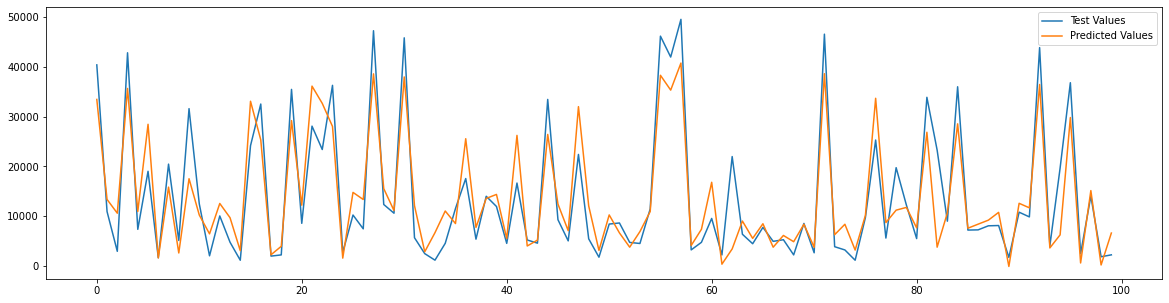

In [41]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## Ensemble models

## AdaBoostClassifier

In [42]:
from sklearn.ensemble import AdaBoostRegressor

In [43]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8157459155502014

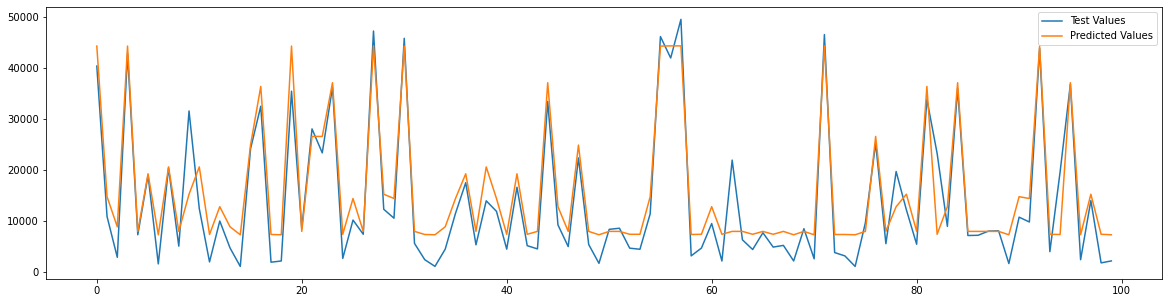

In [44]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## GradientBoostingRegressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8551568642086944

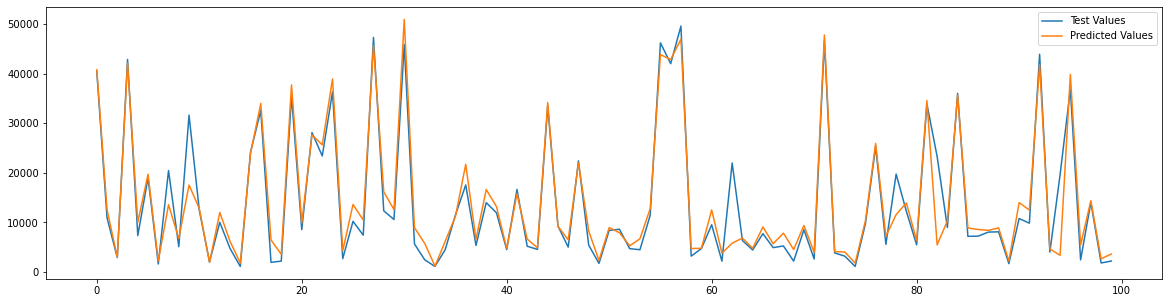

In [47]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## BaggingRegressor

In [48]:
from sklearn.ensemble import BaggingRegressor

In [49]:
model = BaggingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8212875390839646

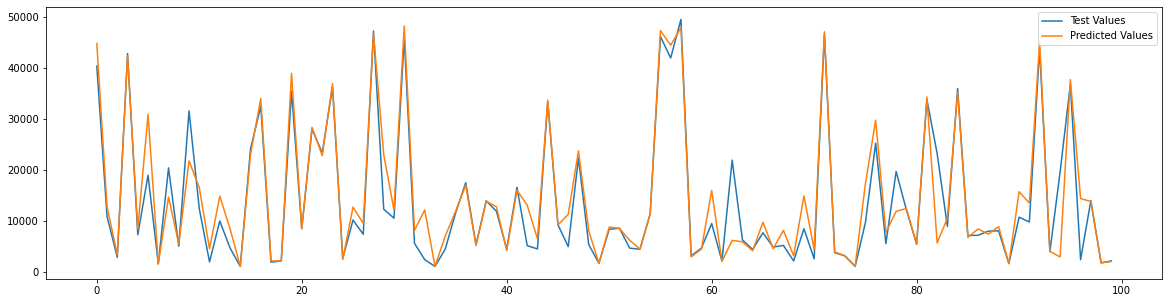

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## ExtraTreesRegressor

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

In [52]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.820663437453158

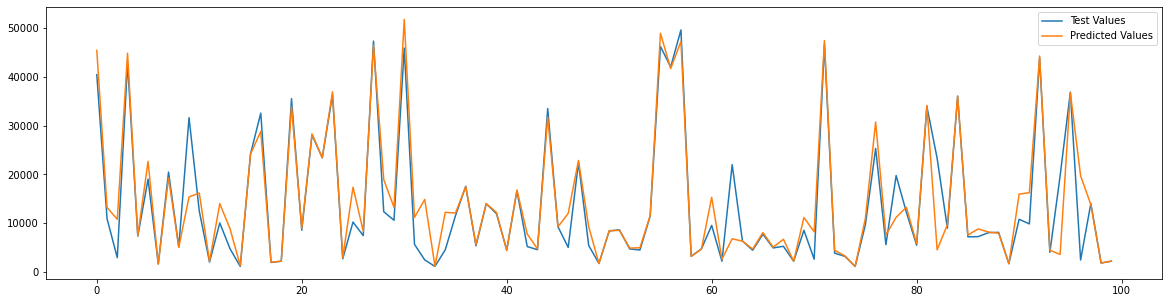

In [53]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8371350762983012

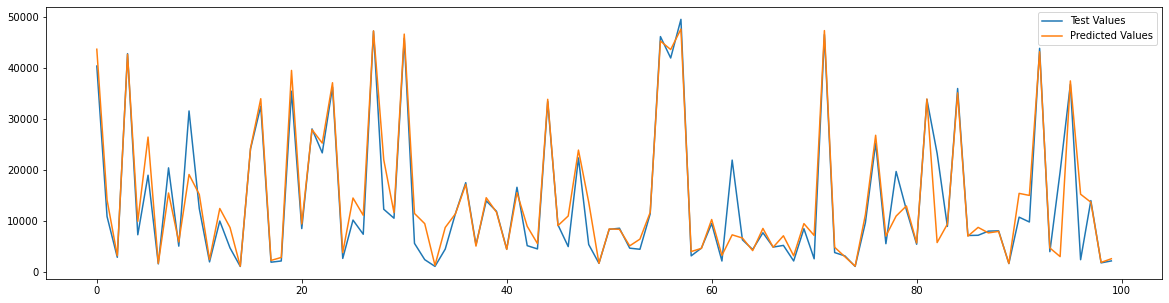

In [56]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.8550109023292767

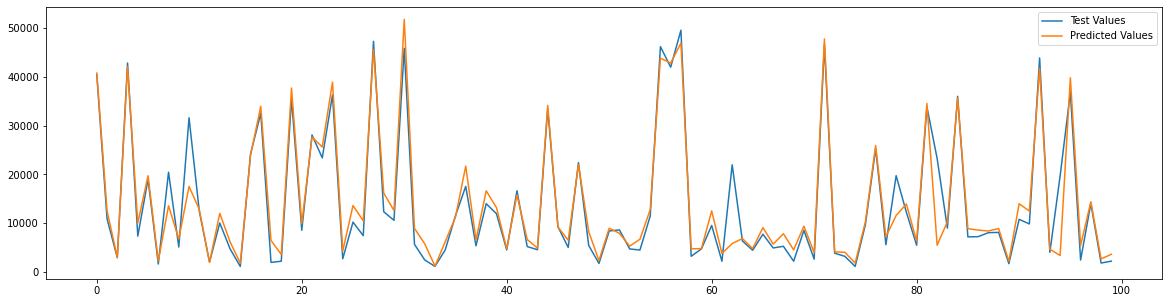

In [59]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

## XGBRegressor

In [60]:
from xgboost import XGBRegressor

In [61]:
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
r2_score(y_test, pred)

0.796991798700289

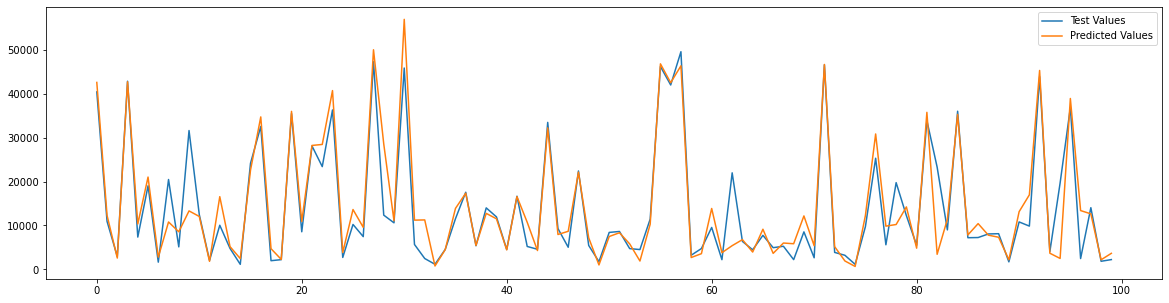

In [62]:
plt.figure(figsize=(20, 5))
plt.plot(y_test.values[:100], label='Test Values')
plt.plot(pred[:100], label='Predicted Values')
plt.legend()

In [63]:
!rmdir /Q /S "Data"